# **Project Name : Credit Card Fraud Detection**
### Credit card fraud detection is a critical component of the financial industry's efforts to protect consumers and businesses from unauthorized or fraudulent transactions. It involves the use of various technologies and techniques to identify and prevent fraudulent activities related to credit card transactions.
#### We have to build a classification model to predict whether a transaction is fraudulent or not.


In [ ]:
# Importing the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [ ]:
# loading the dataset to a pandas DataFrame
credit_card = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card.csv')

In [ ]:
# First 5 rows of the dataset
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Last 5 rows of the dataset
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Checking the size of the dataset
credit_card.shape

(284807, 31)

In [ ]:
# Taking the sample(10%) of the dataset to reduce the runtime as it is taking too much time to run
credit_card_data = credit_card.sample(frac = 0.1)
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101857,67964.0,1.311479,-1.051312,1.648037,-0.169978,-1.996547,0.108087,-1.570250,0.232547,0.745908,...,0.136463,0.747021,-0.087995,0.449438,0.472041,-0.044578,0.084889,0.026608,3.50,0
21861,31899.0,-0.798890,0.863098,1.385914,-0.620477,0.134778,-0.106669,1.125951,-0.017793,-0.232123,...,-0.216509,-0.523654,0.004427,-0.078269,-0.411672,-0.088198,0.040101,-0.067548,80.00,0
20263,30910.0,1.344975,-0.854111,0.479506,-1.052829,-0.747374,0.721624,-1.236809,0.311498,-0.528422,...,0.387950,1.033878,-0.237049,-1.114763,0.462793,0.035318,0.043941,0.001898,24.99,0
195089,130888.0,-0.109548,1.027680,-1.220533,-0.185191,0.460274,-0.949691,0.854169,0.163855,-0.157681,...,0.332310,0.815522,-0.067662,-0.755230,-0.269345,-0.113264,-0.008375,0.065448,75.00,0
107763,70605.0,0.542857,-0.707133,-0.085085,1.402380,-0.521476,-0.808479,0.783020,-0.396538,-0.243595,...,0.261737,0.034135,-0.433839,0.449765,0.595029,-0.371271,-0.047031,0.086270,367.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172084,120952.0,-0.120485,0.727657,-0.211121,-0.430115,1.170269,-0.458623,0.835990,-0.034125,-0.374345,...,0.202760,0.742252,-0.266614,0.762455,0.066335,0.611781,0.014346,0.066795,12.00,0
132735,80093.0,1.170943,0.628200,-0.253306,1.385773,0.041673,-0.979345,0.187290,-0.082545,0.003479,...,-0.027843,-0.012806,-0.044263,0.245038,0.547925,-0.315218,0.046957,0.055683,1.00,0
22387,32219.0,-0.255338,1.097975,1.461077,0.022772,0.235159,-0.916995,0.997293,-0.345195,-0.385789,...,-0.301797,-0.590929,-0.050472,0.352587,-0.153612,0.040548,0.085754,-0.122445,10.02,0
82530,59438.0,-3.804588,2.990939,0.569929,-2.336018,-0.058255,-0.602318,1.292008,-0.707137,3.131087,...,-0.547667,-0.021503,-0.048465,0.193094,0.057722,0.601805,-0.072282,-0.365356,3.84,0


# **Data Preprocessing**

In [ ]:
# Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing value

In [ ]:
# Dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 101857 to 213928
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float

In [ ]:
# Feature Scaling
sc = StandardScaler()
credit_card_data['Amount']=sc.fit_transform(pd.DataFrame(credit_card_data['Amount']))

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101857,67964.0,1.311479,-1.051312,1.648037,-0.169978,-1.996547,0.108087,-1.570250,0.232547,0.745908,...,0.136463,0.747021,-0.087995,0.449438,0.472041,-0.044578,0.084889,0.026608,-0.377004,0
21861,31899.0,-0.798890,0.863098,1.385914,-0.620477,0.134778,-0.106669,1.125951,-0.017793,-0.232123,...,-0.216509,-0.523654,0.004427,-0.078269,-0.411672,-0.088198,0.040101,-0.067548,-0.028963,0
20263,30910.0,1.344975,-0.854111,0.479506,-1.052829,-0.747374,0.721624,-1.236809,0.311498,-0.528422,...,0.387950,1.033878,-0.237049,-1.114763,0.462793,0.035318,0.043941,0.001898,-0.279234,0
195089,130888.0,-0.109548,1.027680,-1.220533,-0.185191,0.460274,-0.949691,0.854169,0.163855,-0.157681,...,0.332310,0.815522,-0.067662,-0.755230,-0.269345,-0.113264,-0.008375,0.065448,-0.051710,0
107763,70605.0,0.542857,-0.707133,-0.085085,1.402380,-0.521476,-0.808479,0.783020,-0.396538,-0.243595,...,0.261737,0.034135,-0.433839,0.449765,0.595029,-0.371271,-0.047031,0.086270,1.280854,0


In [ ]:
# Find shape of our dataset(Number of rows and number of columns)
print("Number of Rows", credit_card_data.shape[0])
print("Number of Columns", credit_card_data.shape[1])

Number of Rows 28481
Number of Columns 31


In [ ]:
# Identifying duplicated values
credit_card_data.duplicated().any()

True

In [ ]:
# Removing duplicated values
df = credit_card_data.drop_duplicates()

In [ ]:
# After removing duplicated values checking the shape of the dataset
df.shape

(28473, 31)

In [ ]:
# Lets check the number of duplicated values removed
56961 - 56900

61

# **Feature Engineering**
**Exoploratoty Data Analysis (EDA)**

In [ ]:
# Distribution of legit transaction & fraudulent transaction
df['Class'].value_counts()

0    28430
1       43
Name: Class, dtype: int64

In [ ]:
# Seperating the data by class
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(28430, 31)
(43, 31)


In [ ]:
# Statistical measures of the data
legit.Amount.describe()

count    28430.000000
mean        -0.000690
std          0.998372
min         -0.392927
25%         -0.368030
50%         -0.295885
75%         -0.047206
max         25.604135
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    43.000000
mean      0.518519
std       1.772720
min      -0.392927
25%      -0.388377
50%      -0.185285
75%       0.510978
max       9.278834
Name: Amount, dtype: float64

Text(0, 0.5, 'Frequency')

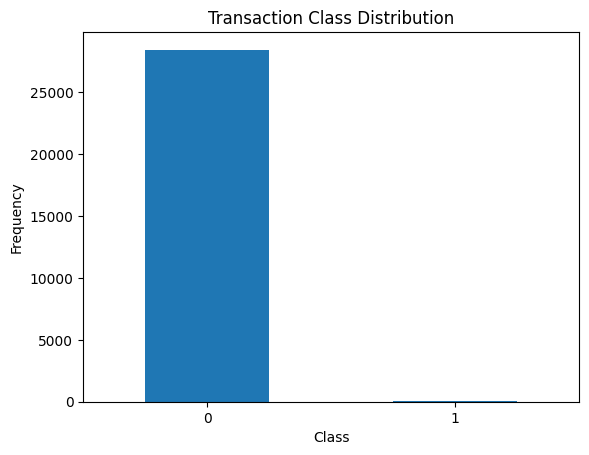

In [ ]:
# Class distribution of legit and fraudulent transaction through bar chart
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title ("Transaction Class Distribution")
plt.xlabel('Class')
plt.ylabel("Frequency")

As per the graph we can say the dataset is highly imbalanced

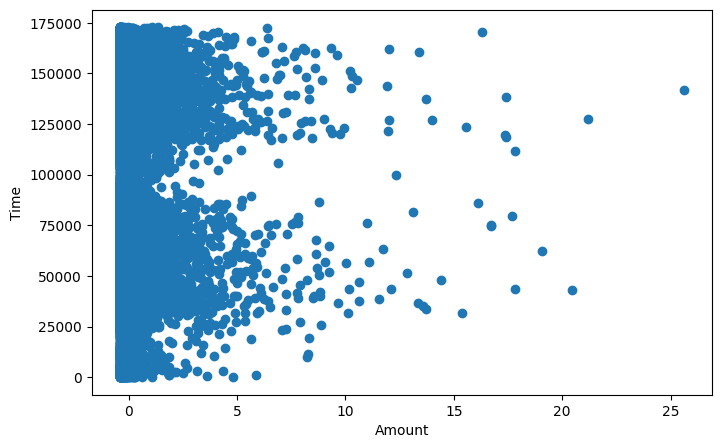

In [ ]:
# Outliers detection
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(df['Amount'], df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

**Dealing with imbalaced data :
SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
# Spliting the data into features & targets
X = df.drop(columns = 'Class', axis = 1)
y = df['Class']

In [ ]:
# Fitting SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    28430
1    28430
Name: Class, dtype: int64

In [ ]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, stratify = y_sm, random_state = 0)

In [ ]:
y_train.value_counts()

1    22744
0    22744
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

0    5686
1    5686
Name: Class, dtype: int64

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(28473, 30) (45488, 30) (11372, 30)


Plotting the correlation Matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevent for the prediction.

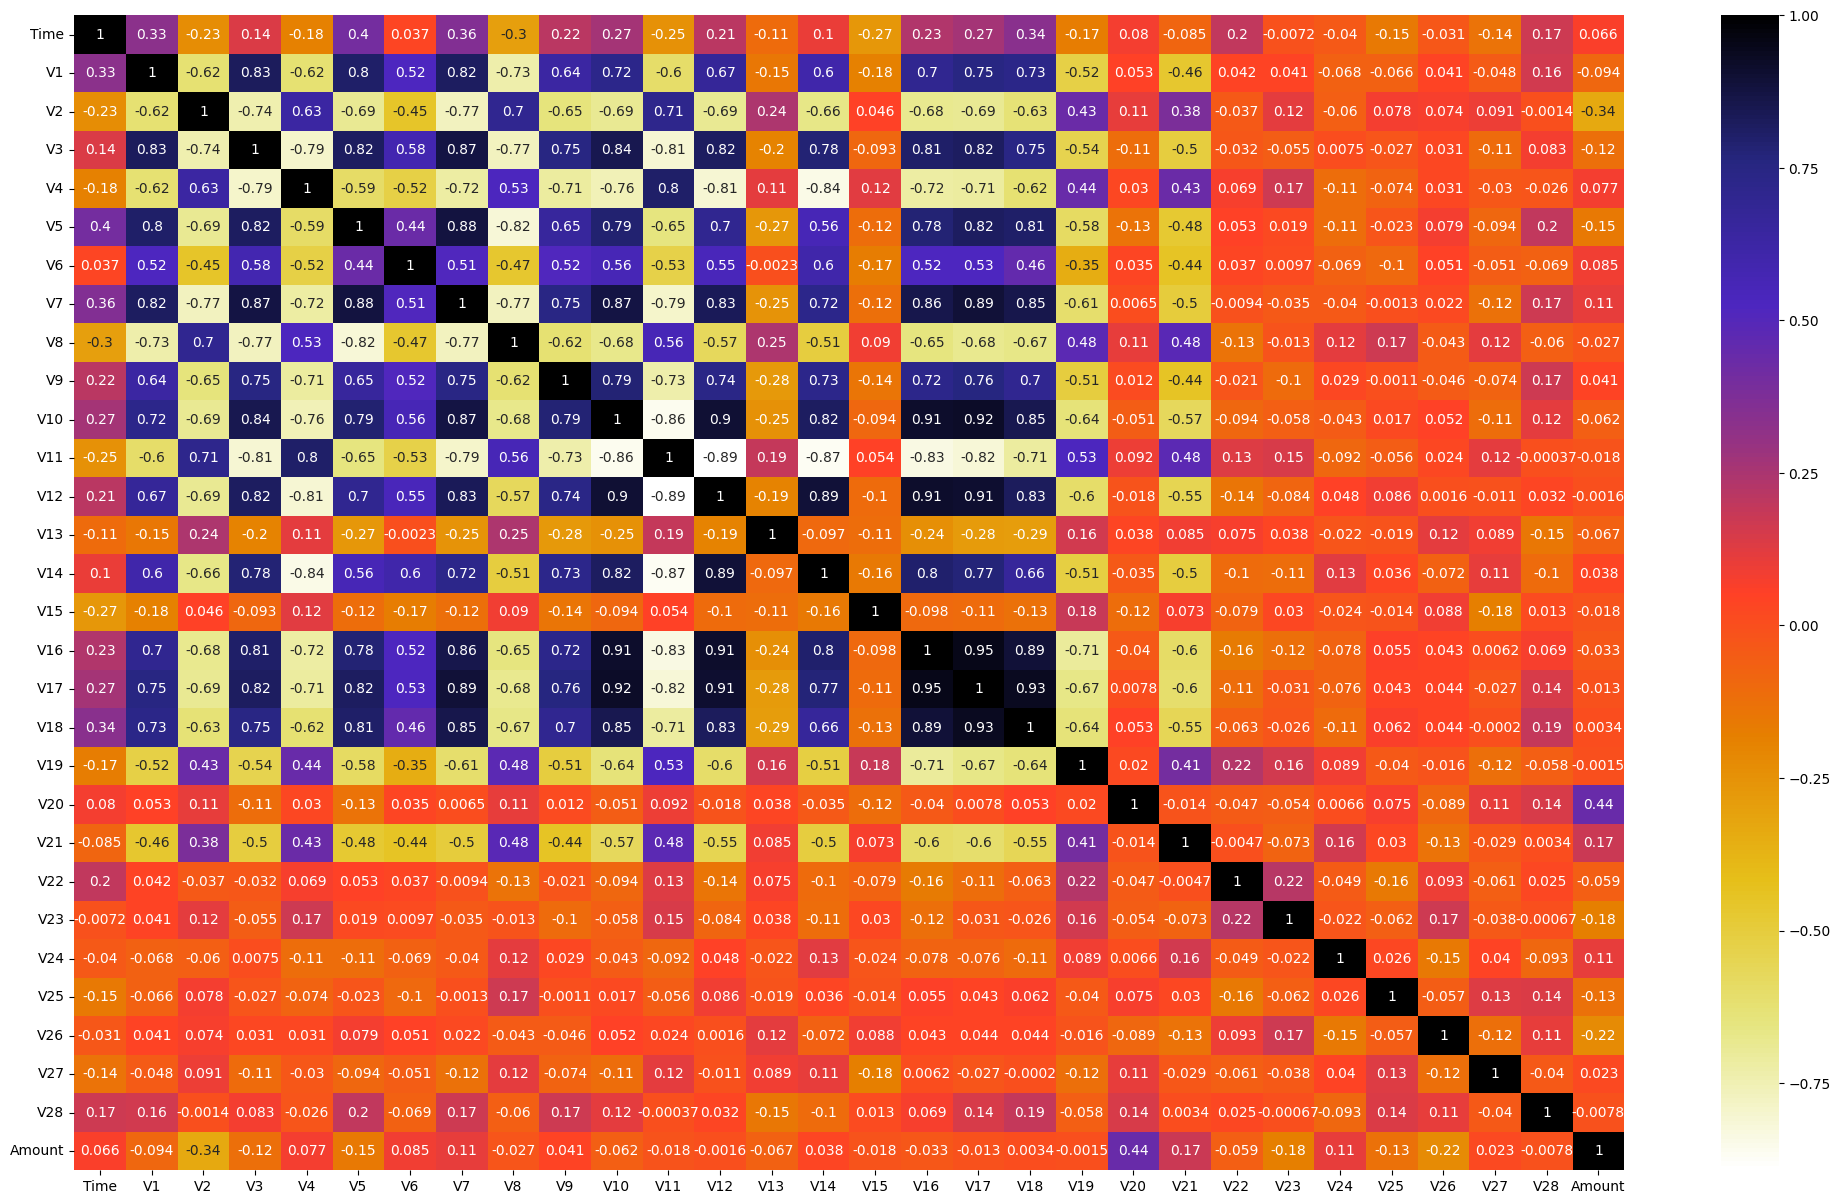

In [ ]:
# Using Pearson Correlation
plt.figure(figsize = (25,15))
cor = X_train.corr()
sns.heatmap(cor, annot = True,cmap = plt.cm.CMRmap_r)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the data available to us.



In [ ]:
# Determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.14593078, 0.27685099, 0.18960493, 0.39793662, 0.3874275 ,
       0.14893717, 0.17884169, 0.29769116, 0.16273286, 0.19188238,
       0.46674365, 0.34876826, 0.4557425 , 0.03082747, 0.48486125,
       0.0429436 , 0.35056059, 0.44116627, 0.19226139, 0.1178656 ,
       0.099759  , 0.30817764, 0.03073911, 0.08287237, 0.07689228,
       0.03043705, 0.05724427, 0.19097668, 0.1872219 , 0.24217912])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14       0.484861
V10       0.466744
V12       0.455742
V17       0.441166
V3        0.397937
V4        0.387428
V16       0.350561
V11       0.348768
V21       0.308178
V7        0.297691
V1        0.276851
Amount    0.242179
V18       0.192261
V9        0.191882
V27       0.190977
V2        0.189605
V28       0.187222
V6        0.178842
V8        0.162733
V5        0.148937
Time      0.145931
V19       0.117866
V20       0.099759
V23       0.082872
V24       0.076892
V26       0.057244
V15       0.042944
V13       0.030827
V22       0.030739
V25       0.030437
dtype: float64

<Axes: >

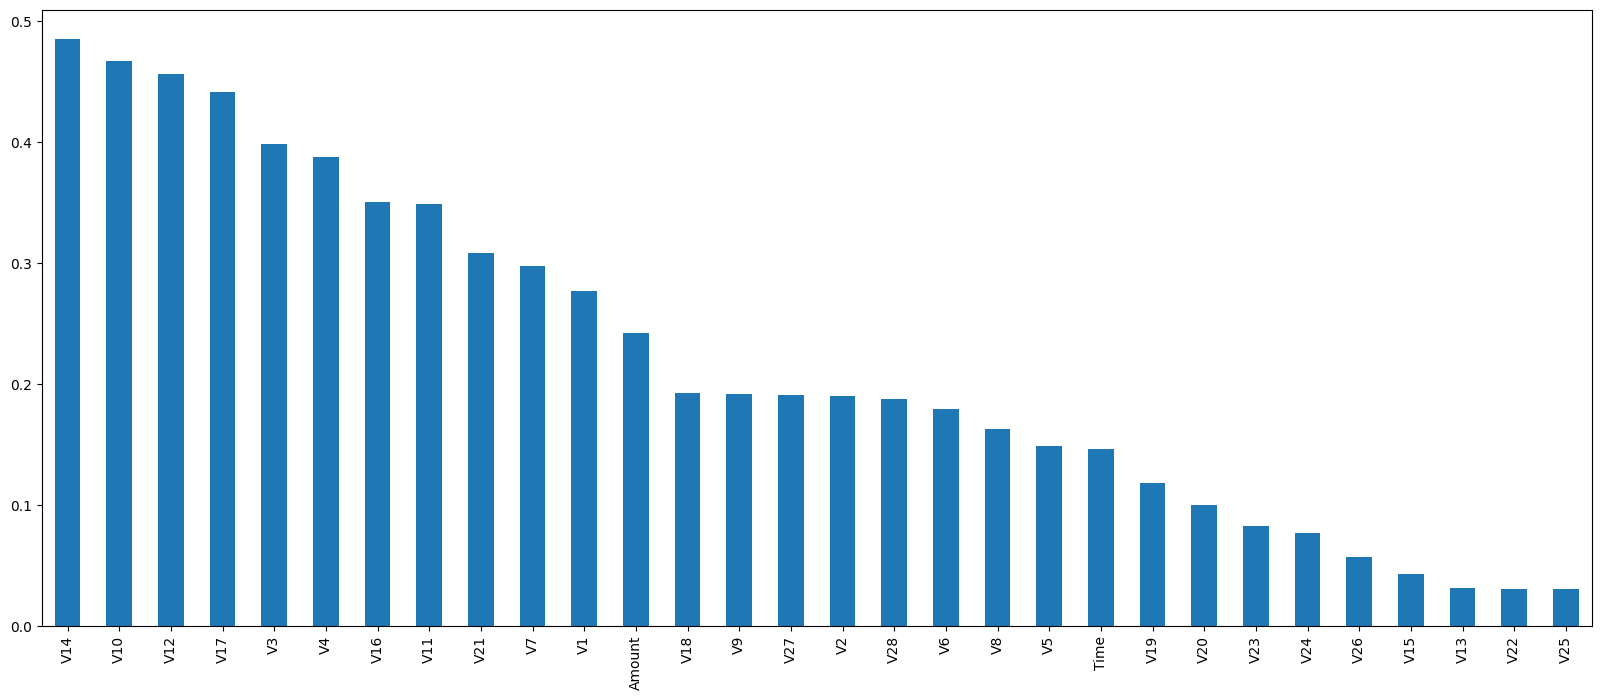

In [ ]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20, 8))

In [ ]:
sel_ten_cols = SelectKBest(mutual_info_classif, k = 15)
sel_ten_cols.fit(X_train, y_train)
X_train.columns[sel_ten_cols.get_support()]

Index(['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'V21', 'V27', 'Amount'],
      dtype='object')

In [ ]:
features = df[['V18', 'Time', 'V5', 'V6', 'V28', 'V8', 'V20', 'V24', 'V23', 'V19', 'V26', 'V22', 'V25', 'V15', 'V13']]
features

,V18,Time,V5,V6,V28,V8,V20,V24,V23,V19,V26,V22,V25,V15,V13
101857,-1.337109,67964.0,-1.996547,0.108087,0.026608,0.232547,0.013244,0.449438,-0.087995,0.990052,-0.044578,0.747021,0.472041,-1.347937,-0.214937
21861,0.004002,31899.0,0.134778,-0.106669,-0.067548,-0.017793,-0.017816,-0.078269,0.004427,-0.842259,-0.088198,-0.523654,-0.411672,0.203837,-1.595315
20263,-0.380873,30910.0,-0.747374,0.721624,0.001898,0.311498,0.110945,-1.114763,-0.237049,0.591772,0.035318,1.033878,0.462793,0.791293,0.057263
195089,1.126511,130888.0,0.460274,-0.949691,0.065448,0.163855,-0.097817,-0.755230,-0.067662,0.062166,-0.113264,0.815522,-0.269345,0.784316,-0.588304
107763,-0.226170,70605.0,-0.521476,-0.808479,0.086270,-0.396538,0.673922,0.449765,-0.433839,-0.495287,-0.371271,0.034135,0.595029,0.832400,1.273135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172084,0.572014,120952.0,1.170269,-0.458623,0.066795,-0.034125,0.006679,0.762455,-0.266614,0.052639,0.611781,0.742252,0.066335,-1.711442,0.507237
132735,0.134947,80093.0,0.041673,-0.979345,0.055683,-0.082545,-0.191301,0.245038,-0.044263,-1.101208,-0.315218,-0.012806,0.547925,1.404809,-0.931916
22387,-0.271701,32219.0,0.235159,-0.916995,-0.122445,-0.345195,0.256210,0.352587,-0.050472,-0.092975,0.040548,-0.590929,-0.153612,0.826640,0.987402
82530,-0.734591,59438.0,-0.058255,-0.602318,-0.365356,-0.707137,1.899115,0.193094,-0.048465,-1.158147,0.601805,-0.021503,0.057722,0.349105,-0.892290


In [ ]:
X_train = X_train.drop(features, axis = 1)
X_test = X_test.drop(features, axis = 1)

In [ ]:
X_train.shape

(45488, 15)

In [ ]:
X_train.head()

,V1,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V21,V27,Amount
34515,-0.676288,1.279093,-2.411860,0.755795,-2.237838,-0.837089,-3.554873,1.966754,-2.918984,-4.418689,-1.631131,-4.910114,0.743859,0.401277,-0.053673
36007,-0.313259,-0.612877,-4.237255,2.857802,0.031512,-0.975411,-2.849141,2.670912,-1.760055,-4.201760,-1.444640,-0.853645,0.650241,0.188626,2.672687
34295,-3.831033,3.027231,-2.946870,3.250893,-3.225941,-1.886384,-3.265805,2.878558,-6.414203,-7.117939,-4.078295,-9.431340,1.904516,-1.289769,-0.205148
2333,2.099239,-0.252684,-1.536077,-0.899231,0.046286,0.464896,-0.069657,0.904740,1.280432,0.425244,0.158012,-0.709793,-0.261859,-0.107822,-0.374729
54642,-0.677233,2.270525,-3.698220,2.622025,-2.257954,-2.036978,-4.145487,3.081898,-3.853521,-6.765552,-1.813650,-4.097301,0.692144,0.506239,-0.151766


# **Model Building**
**Model Training**

In [ ]:
# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]

In [ ]:
# Creating the function for comparing models
def compare_models_train_test():

  for model in models:

    # Training the model
    model.fit(X_train, y_train)

    # Evaluating the model on training data
    train_data_prediction = model.predict(X_train)
    accuracy = accuracy_score(train_data_prediction, y_train)
    print('Accuracy score of the', model, 'on training data =', accuracy)

In [ ]:
compare_models_train_test()

Accuracy score of the LogisticRegression(max_iter=1000) on training data = 0.9699701020049244
Accuracy score of the KNeighborsClassifier() on training data = 0.9995383397819205
Accuracy score of the RandomForestClassifier(random_state=0) on training data = 1.0


In [ ]:
# Model Evaluation on test data
rf_classifier = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
prediction = rf_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(prediction, y_test))
print(accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))

[[5684    0]
 [   2 5686]]
0.9998241294407316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       1.00      1.00      1.00      5688

    accuracy                           1.00     11372
   macro avg       1.00      1.00      1.00     11372
weighted avg       1.00      1.00      1.00     11372



# **Save Model**

In [ ]:
# Saving the model as pickle file
pickle.dump(rf_classifier, open('model_save', 'wb'))

In [ ]:
# Loading the pickle file for prediction
md = pickle.load(open('/content/model_save', 'rb'))

In [ ]:
# Creating a customized transaction
transaction_data = pd.DataFrame({
    'V1' : [-1.951398],
    'V2' : [-1.215899],
    'V3' : [3.550661],
    'V4' : [0.857529],
    'V7' : [-1.651177],
    'V9' : [1.120133],
    'V10'	: [-0.940735],
    'V11' : [0.313347],
    'V12'	: [1.082311	],
    'V14'	: [-0.945211],
    'V16' : [-0.666436],
    'V17'	: [0.419927],
    'V21'	: [0.340890],
    'V27' : [0.120507],
    'Amount' : [-0.364462]
    })

In [ ]:
# Customized Prediction
new_predictions = md.predict(transaction_data)
if new_predictions == 1:
    print('Prediction: Fraudulent Transaction')
else :
    print('Prediction : Genuine Transaction')

Prediction : Genuine Transaction
